In [1]:
# import libraries needed for analysis
%matplotlib inline
import json
from pandas.io.json import json_normalize
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
import squarify as sq
from functools import reduce

In [2]:
#Plot football pitch using matplotlib
def draw_pitch(ax):
    

    #Draw football pitch and halfway line
    plt.plot([0,0],[0,80], color="green")
    plt.plot([0,120],[80,80], color="green")
    plt.plot([120,120],[80,0], color="green")
    plt.plot([120,0],[0,0], color="green")
    plt.plot([60,60],[0,80], color="green")

    #Draw left side penalty area
    plt.plot([14.6,14.6],[57.8,22.2],color="green")
    plt.plot([0,14.6],[57.8,57.8],color="green")
    plt.plot([0,14.6],[22.2,22.2],color="green")

    #Draw right side penalty area
    plt.plot([120,105.4],[57.8,57.8],color="green")
    plt.plot([105.4,105.4],[57.8,22.5],color="green")
    plt.plot([120, 105.4],[22.5,22.5],color="green")

    #Draw left side 6 yard box
    plt.plot([0,4.9],[48,48],color="green")
    plt.plot([4.9,4.9],[48,32],color="green")
    plt.plot([0,4.9],[32,32],color="green")

    #Draw right side 6 yard box
    plt.plot([120,115.1],[48,48],color="green")
    plt.plot([115.1,115.1],[48,32],color="green")
    plt.plot([120,115.1],[32,32],color="green")

    #Create centre circle and spot
    centreCircle = plt.Circle((60,40),8.1,color="green",fill=False)
    centreSpot = plt.Circle((60,40),0.71,color="green")
    #Create left and right side penalty spot
    leftPenSpot = plt.Circle((9.7,40),0.71,color="green")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="green")

    #Draw circles created above
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

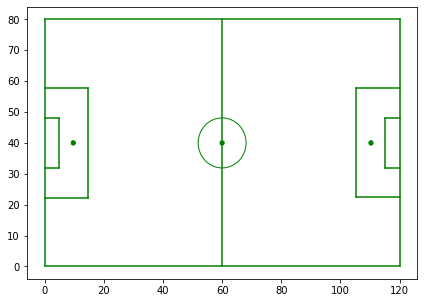

In [3]:
    #Plot football pitch
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax)
    plt.show()

In [4]:
data_id = [7500, 7501, 7502, 7503, 7504, 7505, 7506]
#  read all the json files of matches and concatenate into a pre-defined dataframe
all_england = pd.DataFrame()
for i in data_id:
    with open('men/'+str(i)+'.json') as data_file:
        data = json.load(data_file)
    df = json_normalize(data, sep = '_')
    if all_england.empty:
        all_england = df
    else:
        all_england = pd.concat([all_england, df], join = 'outer', sort = False)

In [7]:
#Create function to merge 
def heat_pass_map(all_england, player_name):
    pass_data = all_england[(all_england['type_name'] == "Pass") & (all_england['player_name'] == player_name)]
    action_data = all_england[(all_england['player_name']==player_name)]
    
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax)
    plt.axis('off')

    for i in range(len(pass_data)):
        # differentiate half by different color
        color = "white" if pass_data.iloc[i]['period'] == 1 else "red"
        ax.annotate("", xy = (pass_data.iloc[i]['pass_end_location'][0], pass_data.iloc[i]['pass_end_location'][1]), xycoords = 'data',
               xytext = (pass_data.iloc[i]['location'][0], pass_data.iloc[i]['location'][1]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = color),)
    x_coord = [i[0] for i in action_data["location"]]
    y_coord = [i[1] for i in action_data["location"]]
    sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
    plt.ylim(0, 80) # need this, otherwise kde plot will go outside
    plt.xlim(0, 120)
    plt.show()

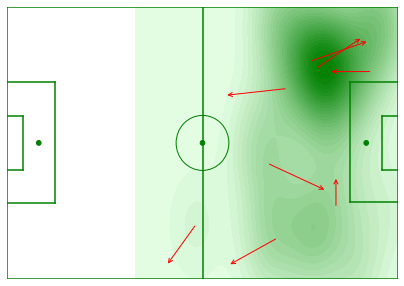

In [8]:
heat_pass_map(df, 'Marcus Rashford')

In [27]:
#Create function to merge 
def heat_shot_map(data, player_name):
    shot_data = all_england[(all_england['type_name'] == "Shot") & (all_england['player_name'] == player_name)]
    action_data = all_england[(all_england['player_name']==player_name)]
    
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax)
    plt.axis('off')

    for i in range(len(shot_data)):
        # we also differentiate different half by different color
        color = "white" if shot_data.iloc[i]['period'] == 1 else "red"
        ax.annotate("", xy = (shot_data.iloc[i]['shot_end_location'][0], shot_data.iloc[i]['shot_end_location'][1]), xycoords = 'data',
               xytext = (shot_data.iloc[i]['location'][0], shot_data.iloc[i]['location'][1]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = color),)
    x_coord = [i[0] for i in action_data["location"]]
    y_coord = [i[1] for i in action_data["location"]]
    sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
    plt.ylim(0, 80) # need this, otherwise kde plot will go outside
    plt.xlim(0, 120)
    plt.show()

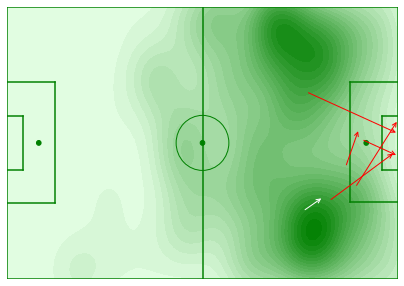

In [30]:
heat_shot_map(df, 'Marcus Rashford')